Instructions: By continuing the previous model based on the micro video lecture posted(Refer to DS Chapter 6 CARD and C50 Code review). Construct a C5.0 model using the test data set that utilizes the same target variable, predictor variables, and minimum cases criterion. Visualize the decision tree.

In [ ]:
import os
import pandas as pd
import graphviz
import statsmodels.tools as stattools
import numpy as np
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [ ]:
from google.colab import files
uploaded = files.upload()
adult_test = pd.read_csv("adult_ch6_test")
adult_train = pd.read_csv("adult_ch6_training")

Saving adult_ch6_test to adult_ch6_test (2)
Saving adult_ch6_training to adult_ch6_training (2)


In [ ]:
#save target variable
y = adult_test[['Income']]

In [ ]:
# convert categorical variable to dummy variables
mar_np = np.array(adult_test['Marital status'])
(mar_cat, mar_cat_dict) = stattools.categorical(mar_np, drop=True, dictnames=True)

/usr/local/lib/python3.8/dist-packages/statsmodels/tools/tools.py:158: FutureWarning: categorical is deprecated. Use pandas Categorical to represent categorical data and can get_dummies to construct dummy arrays. It will be removed after release 0.13.
  warnings.warn(


In [ ]:
# combine the dummy variables back with the
mar_cat_pd = pd.DataFrame(mar_cat)
X = pd.concat((adult_test[['Cap_Gains_Losses']], mar_cat_pd), axis = 1)

In [ ]:
# specify names of combined matrix and the target variable
X_names = ["Cap_Gains_Losses", "Divorced", "Married", "Never-married", "Separated", "Widowed"]
y_names = ["<=50K", ">50K"]

In [ ]:
# train C5.0 model
c50_01 = DecisionTreeClassifier(criterion = "entropy", min_samples_split=75, max_leaf_nodes=5).fit(X,y)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [ ]:
# obtain tree structure with labeles
data = export_graphviz(c50_01, out_file=None, feature_names=X_names, class_names=y_names)

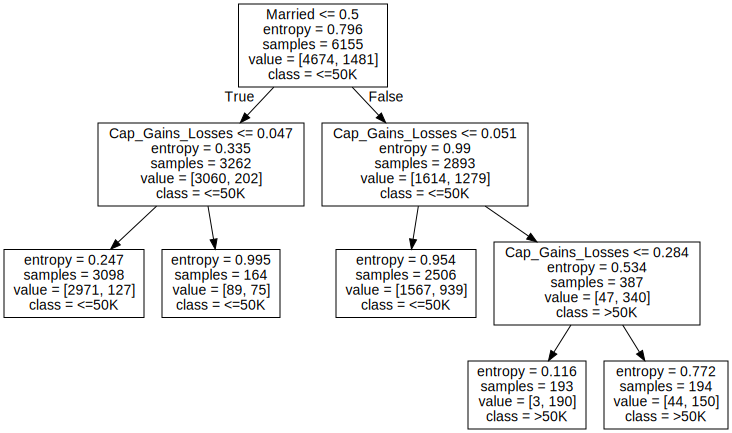

In [ ]:
# display the plot
graphviz.Source(data)

Use random forests on the training data set to predict income using marital status and capital gains and losses.

In [ ]:
# import required packages
from sklearn.ensemble import RandomForestClassifier
import numpy as np

In [ ]:
# save target variable
y = adult_train['Income']

In [ ]:
# convert categorical variable to dummy variables
mar_np = np.array(adult_train['Marital status'])
(mar_cat, mar_cat_dict) = stattools.categorical(mar_np, drop=True, dictnames=True)

/usr/local/lib/python3.8/dist-packages/statsmodels/tools/tools.py:158: FutureWarning: categorical is deprecated. Use pandas Categorical to represent categorical data and can get_dummies to construct dummy arrays. It will be removed after release 0.13.
  warnings.warn(


In [ ]:
# combine the dummy variables back with the
mar_cat_pd = pd.DataFrame(mar_cat)
X = pd.concat((adult_train[['Cap_Gains_Losses']], mar_cat_pd), axis = 1)

In [ ]:
# format for random forest model
rfy = np.ravel(y)

In [ ]:
# train random forest model
rf01 = RandomForestClassifier(n_estimators = 100, criterion="gini").fit(X,rfy)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [ ]:
# return predictions
rf_train = rf01.predict(X)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


Use random forests using the test data set that utilizes the same target and predictor variables. Does the test data result match the training data result?

In [ ]:
# save target variable
y = adult_test['Income']

In [ ]:
# convert categorical variable to dummy variables
mar_np = np.array(adult_test['Marital status'])
(mar_cat, mar_cat_dict) = stattools.categorical(mar_np, drop=True, dictnames=True)

/usr/local/lib/python3.8/dist-packages/statsmodels/tools/tools.py:158: FutureWarning: categorical is deprecated. Use pandas Categorical to represent categorical data and can get_dummies to construct dummy arrays. It will be removed after release 0.13.
  warnings.warn(


In [ ]:
# combine the dummy variables back with the
mar_cat_pd = pd.DataFrame(mar_cat)
X = pd.concat((adult_test[['Cap_Gains_Losses']], mar_cat_pd), axis = 1)

In [ ]:
# format for random forest model
rfy = np.ravel(y)

In [ ]:
# train random forest model
rf01 = RandomForestClassifier(n_estimators = 100, criterion='gini').fit(X,rfy)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [ ]:
# return predictions
rf_test = rf01.predict(X)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [ ]:
#this should have an output
rf_train = pd.DataFrame(rf_train)
rf_train[0].value_counts() / len(rf_train)

<=50K    0.926123
>50K     0.073877
Name: 0, dtype: float64

In [ ]:
#this should have an output
rf_test = pd.DataFrame(rf_test)
rf_test[0].value_counts() / len(rf_test)

<=50K    0.926401
>50K     0.073599
Name: 0, dtype: float64

Based on the output, both models should classify the data as 93% for <=50K and 7% for >=50K

In [ ]:
import datetime
import socket
def get_Host_name_IP():
    try:
        host_name = socket.gethostname()
        host_ip = socket.gethostbyname(host_name)
        print("Hostname:",host_name)
        print("IP Address:",host_ip)
    except:
        print("No visible IP Address")
get_Host_name_IP()
now = datetime.datetime.now()
print ("Time Stamp:", now.strftime("%Y-%m-%d %H:%M:%S"))

Hostname: daff60d9096c
IP Address: 172.28.0.2
Time Stamp: 2023-01-14 13:32:30
